/home/luis/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


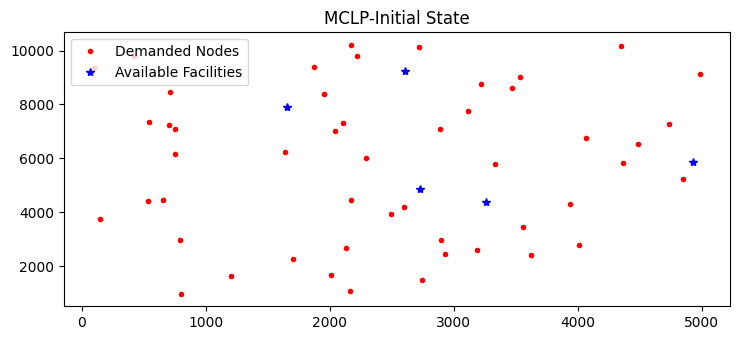

/home/luis/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


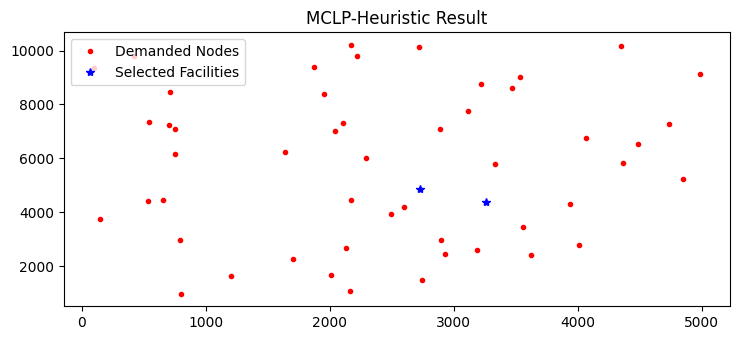

/tmp/ipykernel_1187/2869025781.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfheuristic.loc['Total',:] = dfheuristic.sum(axis=0)



The used locationes are : [1, 4]

There are 19 nodes covered


This are the covered nodes:  [ 1  2  5 10 13 15 17 20 21 25 26 29 30 32 33 35 36 44 45]

The covered population is : 580


Runtime of the Heuristic is:2.3530117000000246


In [1]:
import pandas as pd
import sys
import time
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np
import matplotlib.pyplot as plt

# Initialize the plot
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

instance = "inc50-1.csv"
instance2 = "inp50-1.csv"
    

#Initialize the final results
totalcoverednodes = 0
totalpopulationserved = 0

# initialize time
time_start = time.perf_counter()
posiblelocations = pd.read_csv(instance2)
info = list(posiblelocations.columns)
n = int(info[0])
m = int(info[1])
posiblelocations.rename(columns={info[0]: 'X', info[1]: 'Y'}, inplace=True)
posiblelocations.index += 1


costumers = pd.read_csv(instance,header=None)
costumers.rename(columns={0: 'X', 1: 'Y', 2: 'Demand'}, inplace=True)
costumers.index += 1
costumerscoords = costumers[['X','Y']]

# Ask for constraints
maximumdistance = int(input("Enter the maximum distance in meters for the node to be covered(meters)"))
facilities = int(input("Enter the facilities to be placed in the available locations"))

# Compute distances 

dist2 = euclidean_distances(posiblelocations, costumerscoords)

# Convert back to dataframe.

df = pd.DataFrame( dist2, columns=costumers.index, index=posiblelocations.index)

# Start the heuristic
df['coverednodes'] = df[df <= maximumdistance].count(1)

# This does the sorting, by covered nodes(it maximizes the covered nodes)
df.sort_values(by=['coverednodes'], ascending=False, inplace=True)

dfheuristic = df.iloc[:facilities]


# Initial Plot

plt.plot(costumers['X'].values.tolist(),costumers['Y'].values.tolist(),'r.', label='Demanded Nodes')
plt.plot(posiblelocations['X'].values.tolist(),posiblelocations['Y'].values.tolist(),'b*', label='Available Facilities')
plt.title( 'MCLP-Initial State' )
plt.legend(loc="upper left")
plt.show()

# Selected locations
 
selectedlocations = list(dfheuristic.index.values)

# Final Plot
plt.plot(costumers['X'].values.tolist(),costumers['Y'].values.tolist(),'r.', label='Demanded Nodes')
plt.plot(posiblelocations.loc[selectedlocations,'X'].values.tolist(),posiblelocations.loc[selectedlocations,'Y'].values.tolist(),'b*', label='Selected Facilities')
plt.title( 'MCLP-Heuristic Result' )
plt.legend(loc="upper left")
plt.show()

# Binary Path
for i in range(facilities):
    for j in range(n):
        g = np.where(dfheuristic.iloc[i, j] >= maximumdistance, True, False)
        if g:
            dfheuristic.iloc[i, j] = 1
        else:
            dfheuristic.iloc[i, j] = 0
 
dfheuristic.loc['Total',:] = dfheuristic.sum(axis=0)
dfheuristic[dfheuristic.iloc[-1:] > 1 ] = 1
Binary = dfheuristic.loc['Total',:].values.tolist()   
Binary = Binary[:-1] 
costumers['Binary'] =Binary


#Final Result of the heuristic
for j in range(1,n):
    z = np.where(costumers.loc[j,'Binary'] == 1, True, False)
    if z:
        totalcoverednodes += 1
        totalpopulationserved += costumers.loc[j,'Demand']
        
# Get the index of the node covered
indexofnodes = costumers[costumers['Binary']== 1].index.values

#print all the results
print("\nThe used locationes are :",selectedlocations)
print("\nThere are "+str(totalcoverednodes)+" nodes covered\n")
print('\nThis are the covered nodes: ',indexofnodes)
print("\nThe covered population is :",totalpopulationserved)


# print runtime
time_elapsed = (time.perf_counter() - time_start)
print(f"\n\nRuntime of the Heuristic is:{time_elapsed}")
